In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
url = "C:\\Users\\Ravi Nadageri\\Documents\\Github_projects\\NHANES\\dataset\\nhanes_2015_2016.csv"
da = pd.read_csv(url)

In [4]:
# Recode SMQ020 from 1/2 to Yes/No into new variable SMQ020x
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})
da["SMQ020x"]

0       Yes
1       Yes
2       Yes
3        No
4        No
       ... 
5730    Yes
5731     No
5732    Yes
5733    Yes
5734     No
Name: SMQ020x, Length: 5735, dtype: object

lets cleaning data

In [5]:
# Recode RIAGENDR from 1/2 to Male/Female into new variable RIAGENDRx
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
da["RIAGENDRx"]

0         Male
1         Male
2         Male
3       Female
4       Female
         ...  
5730    Female
5731      Male
5732    Female
5733      Male
5734    Female
Name: RIAGENDRx, Length: 5735, dtype: object

In [6]:
dx = da[["SMQ020x", "RIAGENDRx"]].dropna()
pd.crosstab(dx.SMQ020x, dx.RIAGENDRx)

RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


In [7]:
# Recode SMQ020x from Yes/No to 1/0 into existing variable SMQ020x
dx["SMQ020x"] = dx.SMQ020x.replace({"Yes": 1, "No": 0})
                

In [8]:
dz = dx.groupby("RIAGENDRx").agg({"SMQ020x": [np.mean, np.size]})
dz.columns = ["Proportion", "Total n"]
dz

,Proportion,Total n
RIAGENDRx,,
Female,0.304845,2972
Male,0.513258,2753


# Difference of Two Population Proportions

In [9]:
p = .304845
n = 2972
se_female = np.sqrt(p * (1 - p)/n)
se_female

0.00844415041930423

In [10]:
p = .513258
n = 2753
se_male = np.sqrt(p * (1 - p)/ n)
se_male

0.009526078787008965

In [11]:
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.012729880335656654

In [12]:
d = .304845 - .513258
lcb = d - 1.96 * se_diff
ucb = d + 1.96 * se_diff
(lcb, ucb)

(-0.23336356545788706, -0.18346243454211297)

Difference of Two Population Means

In [13]:
da["BMXBMI"].head()

0    27.8
1    30.8
2    28.8
3    42.4
4    20.3
Name: BMXBMI, dtype: float64

In [14]:
da.groupby("RIAGENDRx").agg({"BMXBMI": [np.mean, np.std, np.size]})

BMXBMI                
                mean       std  size
RIAGENDRx                           
Female     29.939946  7.753319  2976
Male       28.778072  6.252568  2759

In [15]:
sem_female = 7.753319 / np.sqrt(2976)
sem_male = 6.252568 / np.sqrt(2759)
(sem_female, sem_male)

(0.14212523289878048, 0.11903716451870151)

Difference of Two Population Means

In [16]:
da["BMXBMI"].head()

0    27.8
1    30.8
2    28.8
3    42.4
4    20.3
Name: BMXBMI, dtype: float64

In [17]:
da.groupby("RIAGENDRx").agg({"BMXBMI": [np.mean, np.std, np.size]})

BMXBMI                
                mean       std  size
RIAGENDRx                           
Female     29.939946  7.753319  2976
Male       28.778072  6.252568  2759

In [18]:
sem_female = 7.753319 / np.sqrt(2976)
sem_male = 6.252568 / np.sqrt(2759)
(sem_female, sem_male)

(0.14212523289878048, 0.11903716451870151)

In [19]:
sem_diff = np.sqrt(sem_female**2 + sem_male**2)
sem_diff

0.18538993598139303

In [20]:
d = 29.939946 - 28.778072

In [21]:
lcb = d - 1.96 * sem_diff
ucb = d + 1.96 * sem_diff
(lcb, ucb)

(0.798509725476467, 1.5252382745235278)

In [22]:
da = pd.read_csv(url)

In [23]:
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})  # np.nan represents a missing value
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [24]:
dx = da[["SMQ020x", "RIAGENDRx"]].dropna()  # dropna drops cases where either variable is missing
pd.crosstab(dx.SMQ020x, dx.RIAGENDRx)

RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


In [25]:
dz = dx.groupby(dx.RIAGENDRx).agg({"SMQ020x": [lambda x: np.mean(x=="Yes"), np.size]})
dz.columns = ["Proportion", "Total_n"] # The default column names are unclear, so we replace them here
dz

,Proportion,Total_n
RIAGENDRx,,
Female,0.304845,2972
Male,0.513258,2753


In [26]:
p = dz.Proportion.Female # Female proportion
n = dz.Total_n.Female # Total number of females
se_female = np.sqrt(p * (1 - p) / n)
print(se_female)

p = dz.Proportion.Male # Male proportion
n = dz["Total_n"].Male # Total number of males
se_male = np.sqrt(p * (1 - p) / n)
print(se_male)

0.008444152146214435
0.009526078653689868


In [27]:
p = dz.Proportion.Female # Female proportion
n = dz.Total_n.Female # Total number of females
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)  
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)  
print(lcb, ucb)

0.288294683866098 0.32139576027925865


The results above indicate that any population proportion (for female lifetime smokers) between 0.288 and 0.321 would be compatible with the data that we observed in NHANES.

In [28]:
p = dz.Proportion.Male # Male proportion
n = dz.Total_n.Male # Total number of males
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)  
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)  
print(lcb, ucb)

0.49458714955108174 0.531929377873546


The results above indicate that any population proportion (for female lifetime smokers) between 0.288 and 0.321 would be compatible with the data that we observed in NHANES.

The results above indicate that any population proportion (for female lifetime smokers) between 0.288 and 0.321 would be compatible with the data that we observed in NHANES.

In [29]:
# 95% CI for the proportion of females who smoke (compare to value above)
sm.stats.proportion_confint(906, 906+2066)  

(0.2882949879861214, 0.32139545615923526)

In [30]:
# 95% CI for the proportion of males who smoke (compare to value above)
sm.stats.proportion_confint(1413, 1413+1340) 

(0.49458749263718593, 0.5319290347874418)

In [31]:
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.012729881381407434

In [32]:
d = dz.Proportion.Female - dz.Proportion.Male
lcb = d - 2*se_diff
ucb = d + 2*se_diff
print(lcb, ucb)

-0.2338728044024504 -0.18295327887682067


Confidence intervals for subpopulations

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

Text(0, 0.5, 'Female - male smoking proportion')

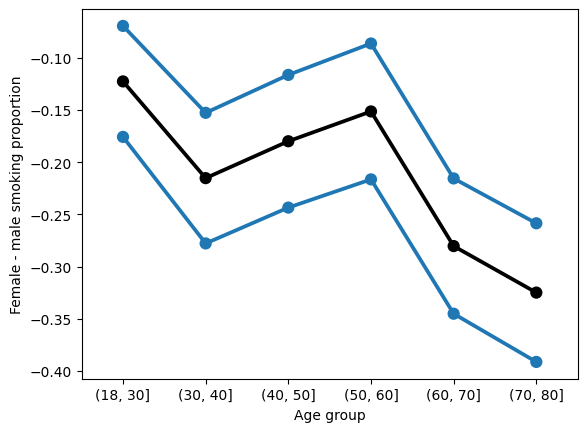

In [34]:
# Calculate the smoking rates within age/gender groups
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
pr = da.groupby(["agegrp", "RIAGENDRx"]).agg({"SMQ020x": lambda x: np.mean(x=="Yes")}).unstack()
pr.columns = ["Female", "Male"]

# The number of people for each calculated proportion
dn = da.groupby(["agegrp", "RIAGENDRx"]).agg({"SMQ020x": np.size}).unstack()
dn.columns = ["Female", "Male"]

# Standard errors for each proportion
se = np.sqrt(pr * (1 - pr) / dn)

# Standard error for the difference in female/male smoking rates in every age band
se_diff = np.sqrt(se.Female**2 + se.Male**2)

# Standard errors for the difference in smoking rates between genders, within age bands

# The difference in smoking rates between genders
pq = pr.Female - pr.Male

x = np.arange(pq.size)
pp = sns.pointplot(x, pq.values, color='black')
sns.pointplot(x, pq - 2*se_diff)
sns.pointplot(x, pq + 2*se_diff)
pp.set_xticklabels(pq.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male smoking proportion")

Confidence intervals for the mean

In [35]:
da.groupby("RIAGENDRx").agg({"BMXBMI": np.mean})

,BMXBMI
RIAGENDRx,
Female,29.939946
Male,28.778072


In [36]:
da.groupby("RIAGENDRx").agg({"BMXBMI": [np.mean, np.std, np.size]})

BMXBMI                
                mean       std  size
RIAGENDRx                           
Female     29.939946  7.753319  2976
Male       28.778072  6.252568  2759

In [37]:
sem_female = 7.753 / np.sqrt(2976)
sem_male = 6.253 / np.sqrt(2759)
print(sem_female, sem_male)

0.14211938534506902 0.119045388988243


In [38]:
lcb_female = 29.94 - 1.96 * 7.753 / np.sqrt(2976)
ucb_female = 29.94 + 1.96 * 7.753 / np.sqrt(2976)
print(lcb_female, ucb_female)

29.661446004723665 30.218553995276338
